In [1]:
import os
import pickle
os.getcwd()
os.chdir("../")

import numpy as np
from matplotlib import pyplot as plt

In [2]:
from src.gpdssm.models import StandardSingleModel, YuleSimonSingleModel
from src.gpdssm.models_ys import ModelLayer, YuleSimonModel
from src.gpdssm.utils import normalize_weights

In [3]:
def mean_average(states, N=100):
    return np.convolve(states, np.ones(N)/N, mode='valid')

In [4]:
cwd = os.getcwd()
model_path = os.path.join(cwd, "models", "train_2.pickle")
with open(model_path, 'rb') as f:
    model_list = pickle.load(f)

In [5]:
cwd = os.getcwd()
Z_path = os.path.join(cwd, "folds", "test_fold_21_Z.txt")
with open(Z_path, 'rb') as f:
    Z_act = pickle.load(f)

In [6]:
C = 3

In [7]:
ys_single_model_list = []


for i in range(C):
    param = {"data_name": model_list[i].data_name,
             "data_fold": model_list[i].data_fold,
             "dim_hidden": model_list[i].dim_hidden,
             "num_rff": model_list[i].J,
             "num_particle": 1000, #model_list[i].M,
             "display_step": model_list[i].display_step,
             "warm_start": model_list[i].warm_start,
             "learning_rate": model_list[i].learning_rate,
             "num_train_cycle": model_list[i].num_train_cycle,
            }
    
    ys_single_model = YuleSimonSingleModel(C, **param)
    ys_single_model.initialize_structure_from_functions(model_list[i].functions[:-1], model_list[-1].functions[-1])
    ys_single_model_list.append(ys_single_model)

In [8]:
a0 = np.array([5] * C)
b0 = np.array([1] * C)
ys_model = YuleSimonModel(data_name="test", data_fold=21, model_list=ys_single_model_list,
                         num_rff=50, num_particle=1000, a0=a0, b0=b0,
                         display_step=100, warm_start=0, learning_rate=0.001, num_train_cycle=1)

In [9]:
ys_model.learn()

>>> train cycle 1
>>> cycle=1, t=1, mse=9.072, mnll=14591.4759, time=0.0 minutes
>>> cycle=1, t=100, mse=9.5516, mnll=22075.359, time=0.05 minutes
>>> cycle=1, t=200, mse=9.5564, mnll=24082.6716, time=0.09 minutes
>>> cycle=1, t=300, mse=8.6341, mnll=23069.7263, time=0.14 minutes
>>> cycle=1, t=400, mse=7.9486, mnll=22477.586, time=0.18 minutes
>>> cycle=1, t=500, mse=7.7334, mnll=22610.3758, time=0.22 minutes
>>> cycle=1, t=600, mse=7.6856, mnll=21859.9338, time=0.27 minutes
>>> cycle=1, t=700, mse=7.4973, mnll=22270.6625, time=0.32 minutes
>>> cycle=1, t=800, mse=7.4865, mnll=22121.6235, time=0.36 minutes
>>> cycle=1, t=900, mse=7.5039, mnll=22476.0244, time=0.41 minutes
>>> cycle=1, t=1000, mse=7.5648, mnll=22988.5817, time=0.46 minutes
>>> cycle=1, t=1100, mse=8.5221, mnll=22517.699, time=0.51 minutes
>>> cycle=1, t=1200, mse=9.0026, mnll=22078.2698, time=0.56 minutes
>>> cycle=1, t=1300, mse=9.3391, mnll=21599.2144, time=0.61 minutes
>>> cycle=1, t=1400, mse=9.9147, mnll=21310.856

In [10]:
ys_layer = ys_model.ys_layer
stored_states = np.array(ys_layer.stored_states)
stored_states = np.array(stored_states[1:, :])
stored_particle_states = np.array(ys_layer.stored_particle_states)

In [11]:
stored_states_ma = np.array([mean_average(stored_states[:, i]) for i in range(C)]).T

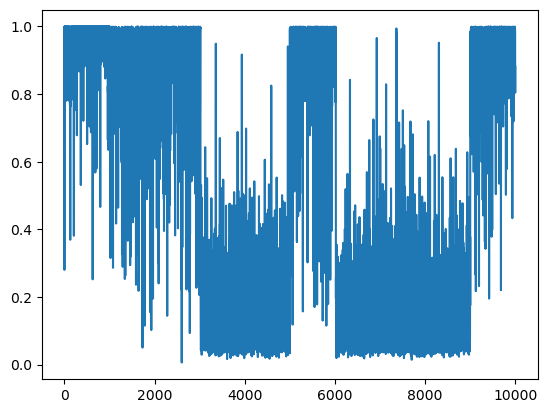

In [12]:
plt.plot(stored_states[:, 0], label = "Predicted Prob of Class 0")
plt.savefig(os.path.join(cwd, "plots", "case2", "raw_est_prob_for_class_0.png"))

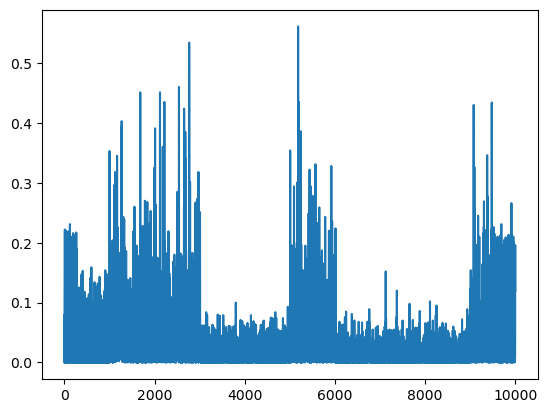

In [13]:
plt.plot(stored_states[:, 1], label = "Predicted Prob of Class 0")
plt.savefig(os.path.join(cwd, "plots", "case2", "raw_est_prob_for_class_1.png"))

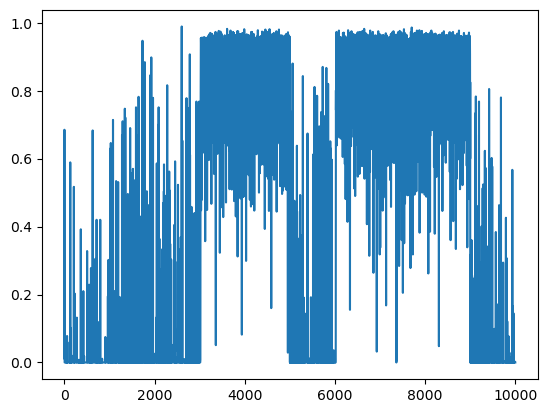

In [14]:
plt.plot(stored_states[:, 2], label = "Predicted Prob of Class 0")
plt.savefig(os.path.join(cwd, "plots", "case2", "raw_est_prob_for_class_2.png"))

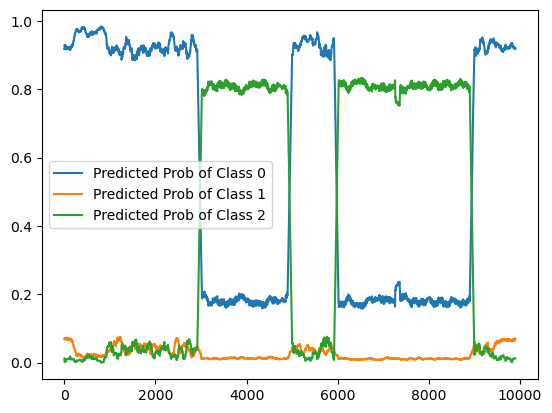

In [15]:
plt.plot(stored_states_ma[:, 0], label = "Predicted Prob of Class 0")
plt.plot(stored_states_ma[:, 1], label = "Predicted Prob of Class 1")
plt.plot(stored_states_ma[:, 2], label = "Predicted Prob of Class 2")
plt.legend()
plt.savefig(os.path.join(cwd, "plots", "case2", "ma_est_prob.png"))

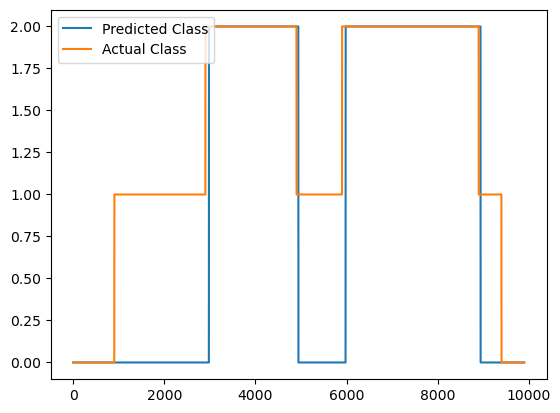

In [16]:
argmax = np.argmax(stored_states_ma, axis=1)
plt.plot(argmax, label = "Predicted Class")
plt.plot(Z_act[99:], label = "Actual Class")
plt.legend()
plt.savefig(os.path.join(cwd, "plots", "case2", "arg_ma_est_prob.png"))

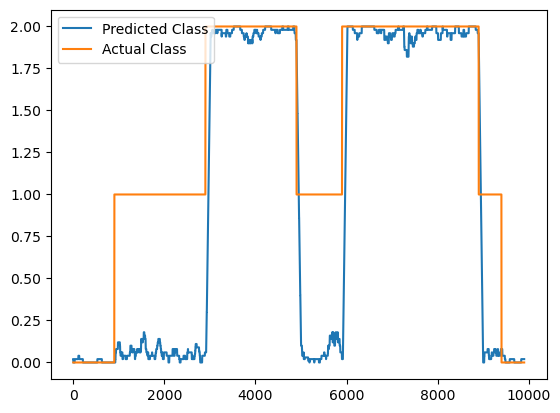

In [17]:
argmax = np.argmax(stored_states, axis=1)
plt.plot(mean_average(argmax), label = "Predicted Class")
plt.plot(Z_act[99:], label = "Actual Class")
plt.legend()
plt.savefig(os.path.join(cwd, "plots", "case2", "ma_arg_est_prob.png"))

In [18]:
pred = np.array(ys_model.ensemble_observation_layer.stored_states)

In [19]:
obs = ys_model.data.Y

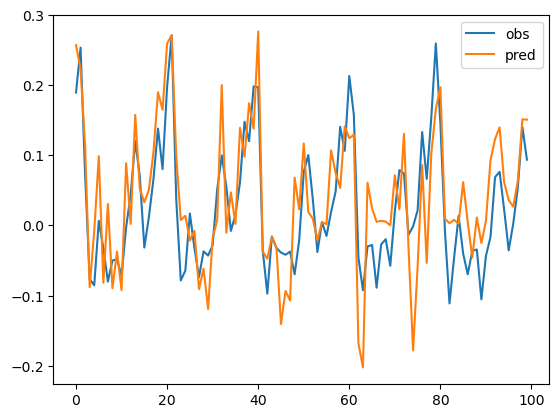

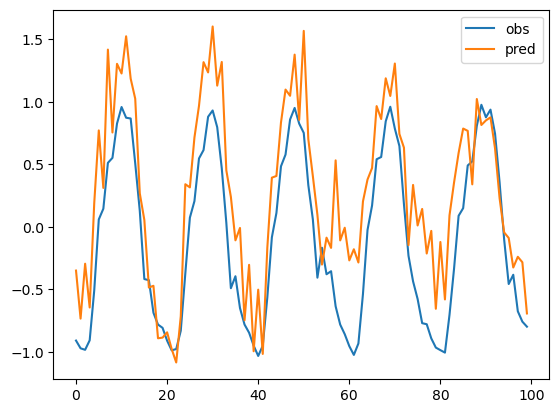

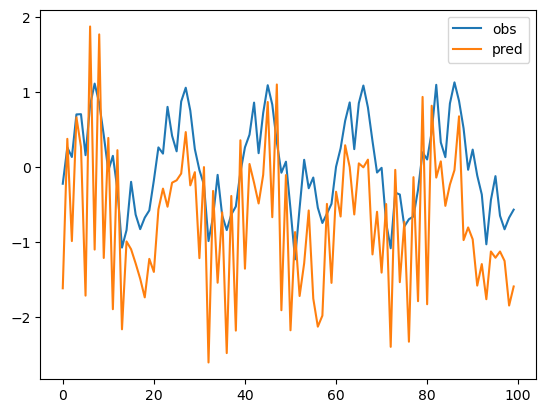

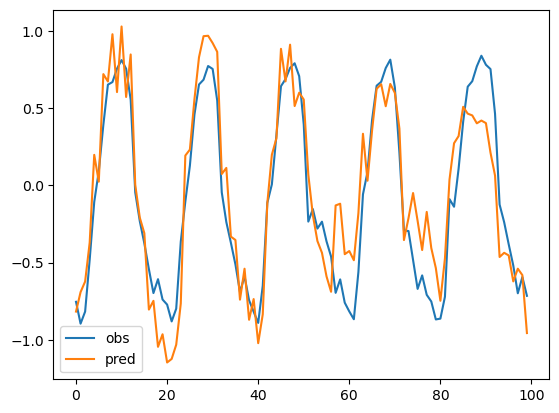

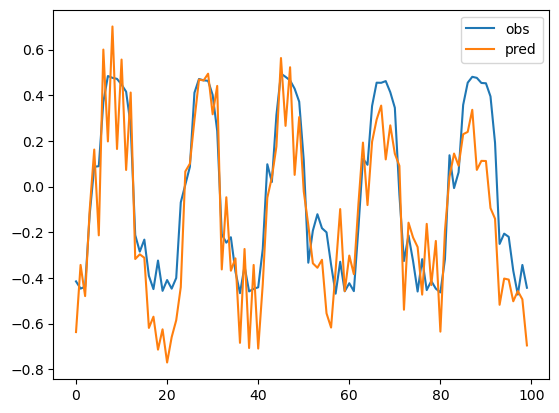

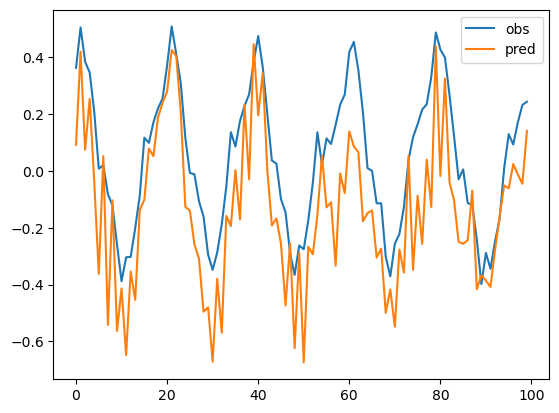

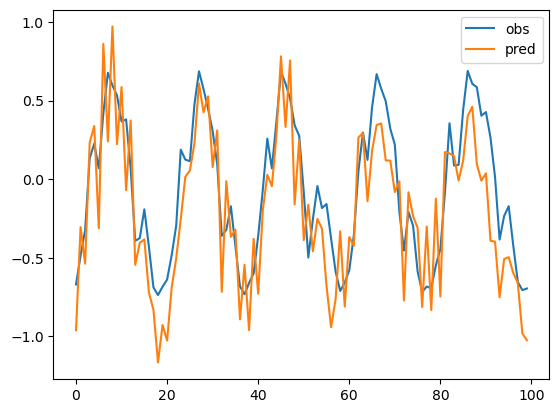

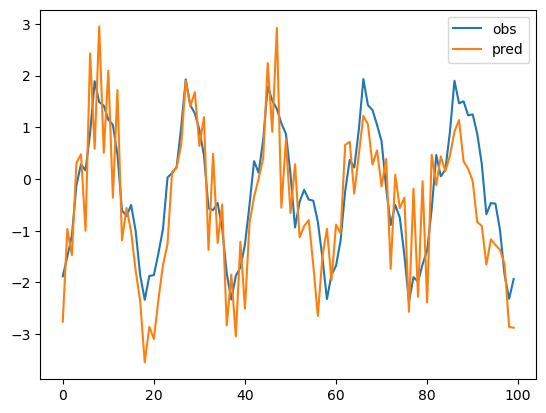

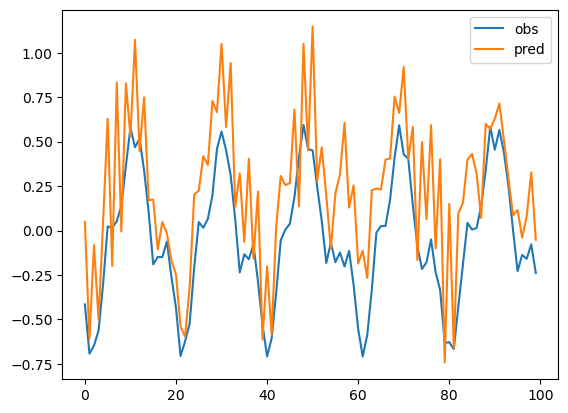

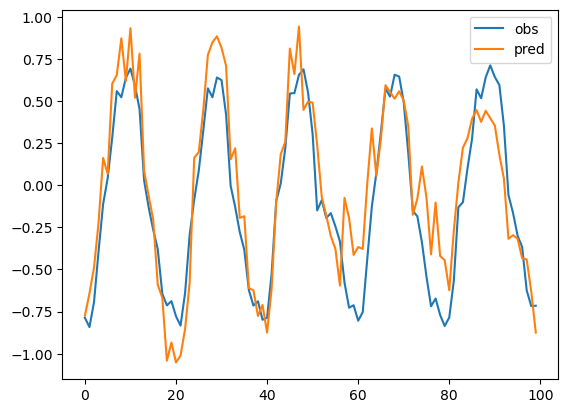

In [20]:
for d in range(10):
    start = 4900
    end = start +100
    plt.plot(obs[start:end,d], label='obs')
    plt.plot(pred[start:end,d], label='pred')
    plt.legend()
    plt.show()